43.19323036299013
43.64745959399956
44.101688825008985
44.55591805601841
45.01014728702784
43.647502022538525
44.0991732175215
44.55084441250449
45.002515607487474
45.45418680247045
44.101688825008985
44.55084441250449
45.0
45.44915558749551
45.898311174991015
44.555792488268104
45.002474037881804
45.44915558749551
45.89583713710922
46.34251868672292
45.009814681442734
45.45406292821687
45.898311174991015
46.34255942176516
46.786807668539296



45.0
45.3182298745214
45.6364597490428
45.9546896235642
46.2729194980856
44.6817701254786
45.0
45.3182298745214
45.6364597490428
45.9546896235642
44.3635402509572
44.6817701254786
45.0
45.3182298745214
45.6364597490428
44.0453103764358
44.3635402509572
44.6817701254786
45.0
45.3182298745214
43.7270805019144
44.0453103764358
44.3635402509572
44.6817701254786
45.0


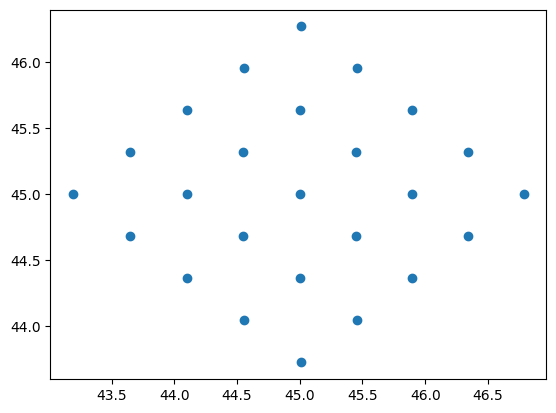

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#this function gives the coordinates of each grid point at either strike extend. assuming both latitude and longitude values to be 111.1km = 1 degree.

#current function generates the coordinates on a square grid of the same extend around the event lat and long. 
#modification required - so that x and y extends are modifiable.
latitudes=[]
longitudes=[]


def strike_coords(strike, event_lat, event_long,extend):
    y_dist=extend * (np.cos(np.deg2rad(strike)))
    new_lat= event_lat + (y_dist/111.1)
    x_dist=extend * (np.sin(np.deg2rad(strike)))
    denom = 111.32 * np.cos(np.deg2rad(event_lat))
    if np.abs(denom) < 1e-2:
        new_long = event_long  # No reliable longitude change, would result in unsuitable values
    else:
        new_long = event_long + (x_dist / denom)

    return new_lat, new_long

def strike_coords_list(strike, event_lat, event_long,extend, gridsize):
    lat_long_list=[]
    grid_list=np.arange(0,1,gridsize, dtype=float)
    rev_grid_list=grid_list[::-1]
    for j in rev_grid_list:
        lat_long_list.append(strike_coords(strike, event_lat, event_long, (-1)*extend*(j + gridsize)))
    lat_long_list.append(strike_coords(strike, event_lat, event_long, 0))
    for i in grid_list:
        lat_long_list.append(strike_coords(strike, event_lat, event_long, extend*(i + gridsize)))
    
    return lat_long_list

def strike_coords_grid_list(strike, event_lat, event_long, extend, gridsize):
    grid_list=[]
    temp=[]
    strike_perpendicular = (strike + 90) % 360
    strike_perpendicular_list=strike_coords_list( strike_perpendicular, event_lat, event_long, extend, gridsize)
    for i in strike_perpendicular_list:
        temp=strike_coords_list(strike, i[0], i[1], extend, gridsize)
        grid_list.append(temp)
        temp=[]
    return grid_list


a =strike_coords_list(45, 45, 45, 100, 0.5) 
strike = 45
event_lat=45
event_long=45
extend=100
gridsize=0.5
#strike_perpendicular_list=strike_coords_list(strike, event_lat, event_long, extend, gridsize)
#print(strike_perpendicular_list)
#print("\n\n")
grid_list=strike_coords_grid_list(strike, event_lat, event_long, extend, gridsize)

#grid_list

latitudes = [coord[0] for row in grid_list for coord in row]
longitudes = [coord[1] for row in grid_list for coord in row]

#print(len(latitudes))
#print(latitudes)

for i in longitudes:
        print(i)

print("\n\n")
for i in latitudes:
        print(i)



plt.scatter(longitudes, latitudes)
plt.show()






